<p align="center">
  <a href="https://www.uit.edu.vn/" title="Trường Đại học Công nghệ Thông tin" style="border: none;">
    <img src="https://i.imgur.com/WmMnSRt.png" alt="Trường Đại học Công nghệ Thông tin | University of Information Technology">
  </a>
</p>
<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>ĐỒ ÁN CUỐI KỲ: KERNEL PCA </b></h1>
<h1 align="center"><b>DATASET: HEART DISEASE PREDICTION </b></h1>

| Tên thành viên    | MSSV     |
| ----------------- | -------- |
| Thái Trần Khánh Nguyên | 19520188 |
| Nguyễn Khánh Như     | 19520209 |
| Lê Văn Trí      | 19521043 |

# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/University/CS116.M12.KHCL/Final_Project_CS116/

/content/drive/MyDrive/University/CS116.M12.KHCL/Final_Project_CS116


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel, FactorRange
from bokeh.models.widgets import Tabs
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, roc_curve, accuracy_score 
from sklearn.pipeline import make_pipeline 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.pipeline import Pipeline
import seaborn as sns 
import matplotlib.pyplot as pl
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import metrics


# Load Dataset

In [4]:
data = pd.read_csv('./Data/HeartFailurePrediction/heart_tidy.csv')
data.columns = [ 'V' + str(i) for i in range(1, 15)]

In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [6]:
for col in data.columns:
    print(f'{col} has {data[col].nunique()} unique values.')

V1 has 41 unique values.
V2 has 2 unique values.
V3 has 4 unique values.
V4 has 50 unique values.
V5 has 152 unique values.
V6 has 2 unique values.
V7 has 3 unique values.
V8 has 91 unique values.
V9 has 2 unique values.
V10 has 40 unique values.
V11 has 3 unique values.
V12 has 4 unique values.
V13 has 3 unique values.
V14 has 2 unique values.


# EDA

In [ ]:
counts = [data.loc[data['V14'] == 0, 'V14'].count(), 
          data.loc[data['V14'] == 1, 'V14'].count()]

p = figure(x_range= ['NotDisease','Disease'], 
           plot_height=300, plot_width = 400)
p.vbar(x=['NotDisease','Disease'], top=counts, width=0.25, 
       color=("Blue", "Orange"))
p.xgrid.grid_line_color = None
p.y_range.start = 0

output_notebook()
show(p)

In [ ]:
trace = go.Scatter3d(
    x = data['V5'],
    y = data['V4'],
    z = data['V1'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['V1']
    )
)
df = [trace]
layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(l=0,r=0,b=0,t=0 ),
    scene = dict(
            xaxis = dict(title  = 'Cholestrol'),
            yaxis = dict(title  = 'Heart Rate'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

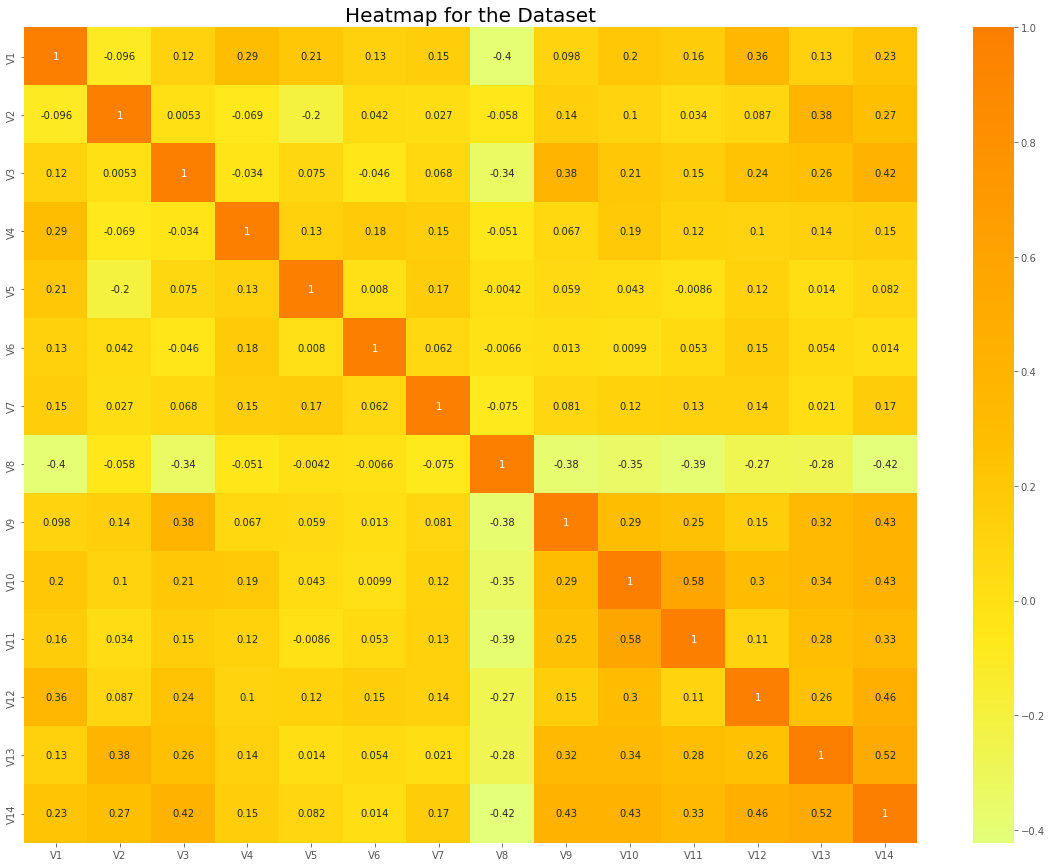

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

# Data Preprocessing

In [7]:
X = data.iloc[:, 0:13]#lay tu cot dau tien den cot ke cuoi 
y = data.iloc[:, -1].values #lay cot cuoi

#phan chia tap train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.245 , random_state = 0)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.84846427,  0.66294076, -0.17976168, ..., -0.96112216,
        -0.72954568, -0.93314945],
       [ 0.59495671, -1.50843042, -2.26315347, ..., -0.96112216,
        -0.72954568, -0.93314945],
       [ 0.26185956,  0.66294076,  0.86193422, ...,  0.67206286,
         0.32736024,  0.6099611 ],
       ...,
       [ 0.92805386,  0.66294076,  0.86193422, ..., -0.96112216,
         2.44117208,  1.12433129],
       [-0.51536712,  0.66294076,  0.86193422, ...,  0.67206286,
        -0.72954568,  1.12433129],
       [ 1.03908624,  0.66294076,  0.86193422, ...,  0.67206286,
         1.38426616,  0.6099611 ]])

In [9]:
sc = StandardScaler()
X = sc.fit_transform(X)


# Train SVM

In [ ]:
import time
import os

In [ ]:
start = time.time()
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)
end = time.time()
print("Time:", end - start)

Time: 0.029944658279418945


In [ ]:
score = classifier.score(X_test, y_test)
predictions =classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)

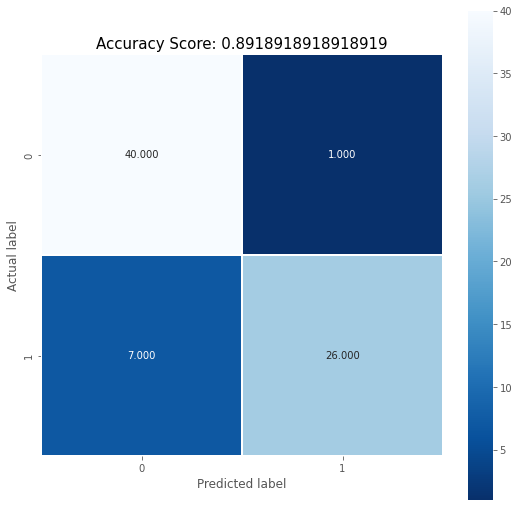

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
clf = Pipeline([
                ("kpca", KernelPCA()),
                ("log_reg",SVC(kernel = 'rbf', random_state = 19520188))
                ])

param_grid = [{"kpca__kernel": ["linear"], "kpca__n_components": [4, 8, 10, 12, 14]},
              {"kpca__kernel": ["rbf"], "kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__n_components": [4, 8, 10, 12, 14]},
              {"kpca__kernel": ["sigmoid"], "kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__n_components": [4, 8, 10, 12, 14]},
              { 'kpca__kernel': ['poly'], 'kpca__degree': [1,2,3,5], "kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__n_components": [4, 8, 10, 12, 14]}]

In [ ]:
grid_search = GridSearchCV(clf, param_grid, refit = True, verbose = 3, cv = 5)
grid_search.fit(X, y)

Fitting 5 folds for each of 305 candidates, totalling 1525 fits
[CV 1/5] END kpca__kernel=linear, kpca__n_components=4;, score=0.783 total time=   0.0s
[CV 2/5] END kpca__kernel=linear, kpca__n_components=4;, score=0.917 total time=   0.0s
[CV 3/5] END kpca__kernel=linear, kpca__n_components=4;, score=0.817 total time=   0.0s
[CV 4/5] END kpca__kernel=linear, kpca__n_components=4;, score=0.850 total time=   0.0s
[CV 5/5] END kpca__kernel=linear, kpca__n_components=4;, score=0.800 total time=   0.0s
[CV 1/5] END kpca__kernel=linear, kpca__n_components=8;, score=0.817 total time=   0.0s
[CV 2/5] END kpca__kernel=linear, kpca__n_components=8;, score=0.933 total time=   0.0s
[CV 3/5] END kpca__kernel=linear, kpca__n_components=8;, score=0.817 total time=   0.0s
[CV 4/5] END kpca__kernel=linear, kpca__n_components=8;, score=0.850 total time=   0.0s
[CV 5/5] END kpca__kernel=linear, kpca__n_components=8;, score=0.767 total time=   0.0s
[CV 1/5] END kpca__kernel=linear, kpca__n_components=10;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('log_reg',
                                        SVC(random_state=19520188))]),
             param_grid=[{'kpca__kernel': ['linear'],
                          'kpca__n_components': [4, 8, 10, 12, 14]},
                         {'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf'],
                          'kpca__n_components': [4...
                         {'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['sigmoid'],
                          'kpca__n_components': [4, 8, 10, 12, 14]},
                         {'kpca__degree': [1, 2, 3, 5],
                          'kpca__ga

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'kpca__gamma': 0.03222222222222222, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 8}
0.8466666666666667


In [ ]:
import pandas as pd
data_csv = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
data_csv = pd.concat([data_csv, pd.DataFrame(grid_search.cv_results_["mean_fit_time"], columns=["Fit_time"])], axis=1)

In [ ]:
data_csv.to_csv('file.csv', encoding='utf-8')

# Genetic Algorithm

In [10]:
!pip install sklearn-genetic-opt

     |████████████████████████████████| 160 kB 9.6 MB/s 


In [11]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [15]:
clf = Pipeline([
                ("kpca", KernelPCA()),
                ("log_reg",SVC(kernel = 'rbf', random_state = 19520188))
                ])

param_grid = {"kpca__kernel": Categorical(["linear", "rbf", "sigmoid", "poly"]), 
              "kpca__n_components": Categorical( [4, 8, 10, 12, 14]),
              "kpca__gamma": Continuous(0.03, 0.05, distribution='log-uniform'),
              'kpca__degree': Categorical([1,2,3,5])
              }
              

cv = StratifiedKFold(n_splits=5, shuffle=True)

In [16]:
evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=25,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [17]:
evolved_estimator.fit(X, y)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.829333	0.00879394 	0.84       	0.806667   
1  	15    	0.832667	0.00592546 	0.843333   	0.823333   
2  	20    	0.836   	0.00442217 	0.84       	0.826667   
3  	15    	0.836333	0.00433333 	0.84       	0.826667   
4  	18    	0.834333	0.00715697 	0.84       	0.816667   
5  	17    	0.838333	0.00428174 	0.843333   	0.83       
6  	18    	0.843667	0.00458258 	0.85       	0.836667   
7  	17    	0.845667	0.00448454 	0.85       	0.84       
8  	18    	0.841667	0.00872417 	0.85       	0.826667   
9  	17    	0.842667	0.0038873  	0.85       	0.836667   
10 	17    	0.838   	0.00669992 	0.843333   	0.823333   
11 	19    	0.836333	0.00585947 	0.843333   	0.826667   
12 	18    	0.840333	0.00458258 	0.843333   	0.83       
13 	15    	0.839333	0.00663325 	0.843333   	0.823333   
14 	18    	0.840667	0.0069602  	0.843333   	0.82       
15 	17    	0.842   	0.00305505 	0.843333   	0.833333   
16 	19    	0.842   	0.00426875 	0.846667   	0.83

GASearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
           estimator=Pipeline(steps=[('kpca',
                                      KernelPCA(degree=2,
                                                gamma=0.03902836260076668,
                                                kernel='sigmoid',
                                                n_components=12)),
                                     ('log_reg', SVC(random_state=19520188))]),
           generations=25, keep_top_k=4, n_jobs=-1,
           param_grid={'kpca__degree': <sklearn_genetic.space.space.Categorical object at 0x7f41bd6c31d0>,
                       'kpca__gamma': <sklearn_genetic.space.space.Continuous object at 0x7f41bd6c3150>,
                       'kpca__kernel': <sklearn_genetic.space.space.Categorical object at 0x7f41bd6b8f50>,
                       'kpca__n_components': <sklearn_genetic.space.space.Categorical object at 0x7f41bd6c3190>},
           return_train_score=True, scoring='ac

In [18]:
evolved_estimator.best_estimator_

Pipeline(steps=[('kpca',
                 KernelPCA(degree=2, gamma=0.03902836260076668,
                           kernel='sigmoid', n_components=12)),
                ('log_reg', SVC(random_state=19520188))])

In [19]:
evolved_estimator.best_params_

{'kpca__degree': 2,
 'kpca__gamma': 0.03902836260076668,
 'kpca__kernel': 'sigmoid',
 'kpca__n_components': 12}

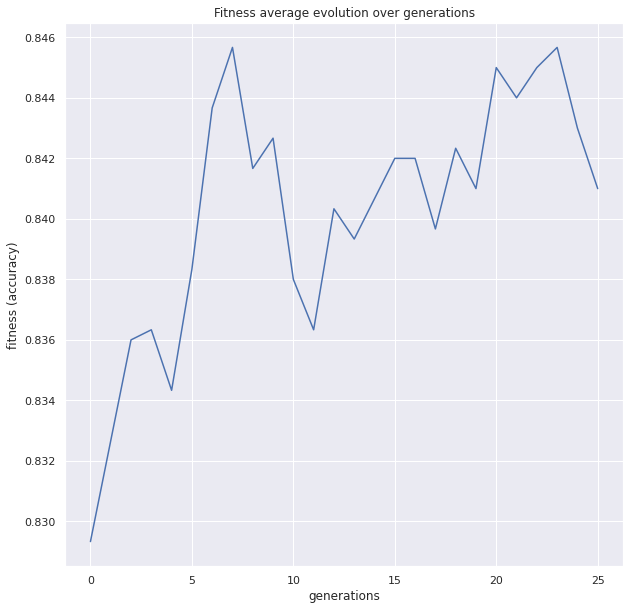

In [20]:
plot_fitness_evolution(evolved_estimator)
plt.show()

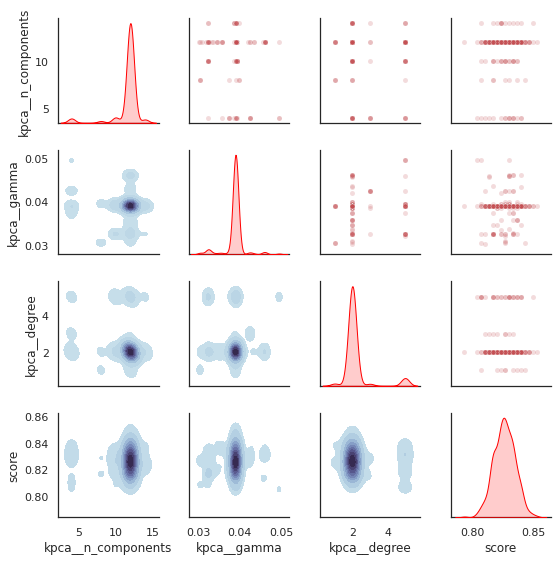

In [21]:
plot_search_space(evolved_estimator)
plt.show()

In [22]:
print("Parameter and cv scores in each iteration:")
print(evolved_estimator.logbook)

Parameter and cv scores in each iteration:
                                                                                                                                                                       parameters                                                                                                                                                                       
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
cv_scores                                               	fit_time                                                	index	kpca__degree	kpca__gamma	kpca__kernel	kpca__n_components	score   	score_time                                              	train_score             

In [24]:
print(type(evolved_estimator.logbook))

<class 'deap.tools.support.Logbook'>
